In [262]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)


st = time.time()

# data is an array of dicts where the array index stands for the sample number
data = np.load(os.path.expanduser('~/quantum-ml/data/random_K_b_mu_h.npy'))

n_tot = data.shape[0]
# train_total_factor : size of training set in comparison to the total
# 0.8 sound good
train_total_factor = 0.8
n_train = int(train_total_factor*n_tot)
n_test = n_tot - n_train

print("Total, Training, Test")
print(n_tot, n_train, n_test)

# number of inputs is length of the current vector and number of parameters like K_onsite,b_mu,b_h and so on
n_inp = len(data[0]['I'])

# number of outputs
n_out = len(data[0]['CS'])

I_test_data = np.array([np.cumsum(x['I']) for x in data[n_train:]])
Y_test_data = np.array([x['CS'] for x in data[n_train:]])

#get data
def get_train_inputs():
    train_data = np.random.permutation(data[:n_train])
    I_train_data = np.array([np.cumsum(x['I']) for x in train_data])
    Y_train_data = np.array([x['CS'] for x in train_data])
    x = tf.constant(I_train_data)
    y = tf.constant(Y_train_data)
    feature_cols = {"I": x}
    return feature_cols,y

def get_test_inputs():
    x = tf.constant(I_test_data)
    y = tf.constant(Y_test_data)
    feature_cols = {"I": x}
    return feature_cols,y

# load datasets
I = tf.contrib.layers.real_valued_column("I",dimension=n_inp)
features = [I]
regressor = tf.contrib.learn.DNNRegressor(feature_columns=features,label_dimension=n_out,hidden_units=[100,50,24,12,6])

# Magic happens here!

regressor.fit(input_fn=get_train_inputs, steps=10000)


predictions = np.rint(list(regressor.predict(input_fn=get_test_inputs)))
y = tf.constant(predictions,tf.float32)
y_ = tf.constant(Y_test_data,tf.float32)
diff = tf.equal(y , y_)
accuracy = tf.reduce_mean(tf.cast(diff, tf.float32))
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
a = sess.run(accuracy)
print("Validation accuracy",a)

print("Completed in",time.time()-st, "seconds.")

Total, Training, Test
500 400 100
Validation accuracy 0.6023
Completed in 83.07342314720154 seconds.


Validation accuracy 0.8291


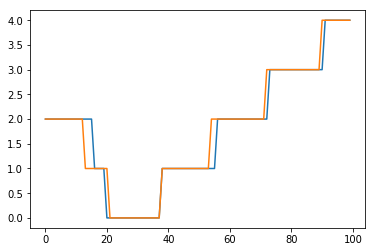

In [259]:
predictions = np.rint(list(regressor.predict(input_fn=get_test_inputs)))
y = tf.constant(predictions,tf.float32)
y_ = tf.constant(Y_test_data,tf.float32)
diff = tf.equal(y , y_)
accuracy = tf.reduce_mean(tf.cast(diff, tf.float32))
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
a = sess.run(accuracy)
print("Validation accuracy",a)

i = 8
plt.plot(Y_test_data[i])
plt.plot(predictions[i])

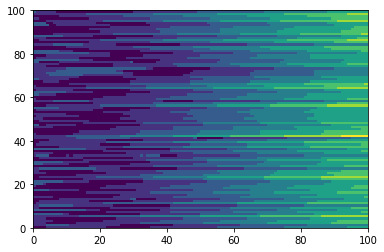

In [223]:
plt.pcolor(Y_test_data)


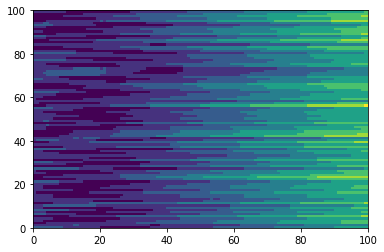

In [225]:
plt.pcolor(predictions)

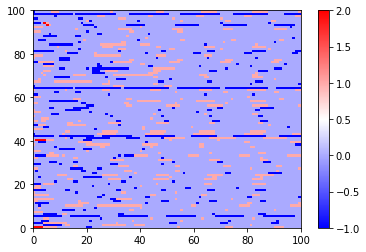

In [233]:
plt.pcolor(predictions-Y_test_data,cmap='bwr')
plt.colorbar()